## Importing all the required library

In [93]:
## Data Manipulation 
import numpy as np 
import pandas as pd
from scipy import stats 

## Data Vizualization
import matplotlib.pyplot as plt
import seaborn as sns


# Data pre-processing
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, PowerTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer

## ML Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## Utilities
import warnings 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


# Loading the data

In [94]:
train = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

In [95]:
print(f'Shape of the Training data: {train.shape}')
print(f'Shape of the Testing data: {test.shape}')

Shape of the Training data: (159256, 24)
Shape of the Testing data: (106171, 23)


In [96]:
# Analysis the basic data
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [97]:
## Dropping the id column from both train and test data
train.drop(columns = 'id', inplace=True)
test.drop(columns = 'id', inplace=True)

## Data Dictionary

- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- dental caries
- smoking

In [98]:
# Lets see all the columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

## Baisc explortaion

In [99]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,159256.0,44.306626,11.842286,20.0,40.0,40.0,55.0,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.0,165.0,170.0,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.0,65.0,75.0,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.0,83.0,89.0,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.8,1.0,1.2,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.8,1.0,1.2,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.0,1.0,1.0,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.0,1.0,1.0,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.0,121.0,130.0,213.0
relaxation,159256.0,76.874071,8.994642,44.0,70.0,78.0,82.0,133.0


Percentage of Smoking vs Non-Somoking
smoking
0    0.562635
1    0.437365
Name: proportion, dtype: float64


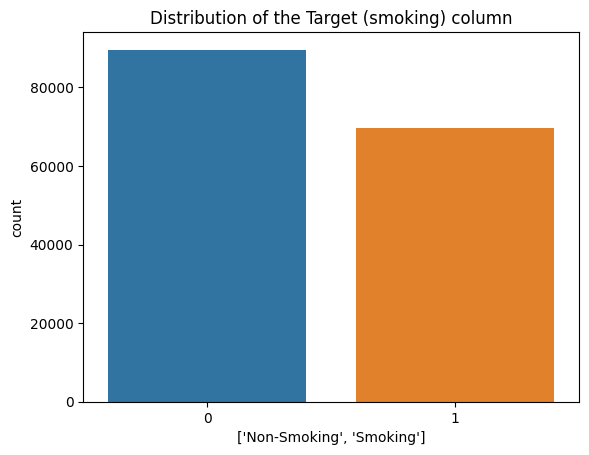

In [100]:
def target_description(train,target):
    
    print('Percentage of Smoking vs Non-Somoking')
    print(train[target].value_counts(normalize = True))
    
    sns.countplot(train, x=target)
    plt.title(f'Distribution of the Target ({target}) column')
    plt.xlabel(['Non-Smoking', 'Smoking'])
    
target_description(train,'smoking')

 Its roughly balanced. We can use this directly

## Missing values

In [101]:
train.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

#### Good News, There are no null data.

# EDA

## Utility Functions

In [102]:
def plot_histogram(df, hue = None):
    """ To Plot the histogram of the continuous feature"""
    print(f'Datapoint distribution of {df.name}')
    print(df.describe())
    plt.figure(figsize=(10,6))
    sns.displot(x = df, hue = hue, kind='kde', color='red')
    plt.title(f'Datapoint distribution of {df.name}')
    plt.show()
    

def plot_countplot(df, n=100, hue = None ):
    """ To plot bargraph to get the count of each score feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.countplot(df, hue = hue,  order=pd.value_counts(df).iloc[:n].index)


def plot_boxplot(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(x,y)


def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df,x=10,y=6):
    """To plot the correaltion matrix to understand which feature is more related to target variable"""
    plt.figure(figsize=(x,y))
    plt.title(f'Correlation Matrix')
    corr = df.corr()
    # Getting the Upper Triangle of the co-relation matrix
    matrix = np.triu(corr)
    # using the upper triangle matrix as mask 
    sns.heatmap(corr, annot=True, mask=matrix)
    

def plot_distribution(train,test,col):
    """To plot the distribution(Histogram) and boxplot together for each cols"""
    
    #Set the figure size
    plt.figure(figsize=(15,4))
    
    #Set the first plot (row=1, columns=2, plot = 1)
    plt.subplot(1,3,1)
    sns.kdeplot(train[col], label='Train')
    sns.kdeplot(test[col], label='Test')
    # Set the title of the first subplot
    plt.title(f'Histogram of ({col}) in train dataset')
    plt.legend()
    
    #Set the second plot (row=1, columns=2, plot = 2)
    plt.subplot(1,3,2)
    sns.boxplot(train[col], color='green',medianprops={'color': 'red', 'label': '_median_'})
    # Set the title of the second subplot
    plt.title(f'Boxplot of ({col}) in train dataset')
    
    #Set the third plot (row=1, columns=2, plot = 2)
    plt.subplot(1,3,3)
    sns.boxplot(test[col], color='green',medianprops={'color': 'red', 'label': '_median_'})
    # Set the title of the second subplot
    plt.title(f'Boxplot of ({col}) in test dataset')

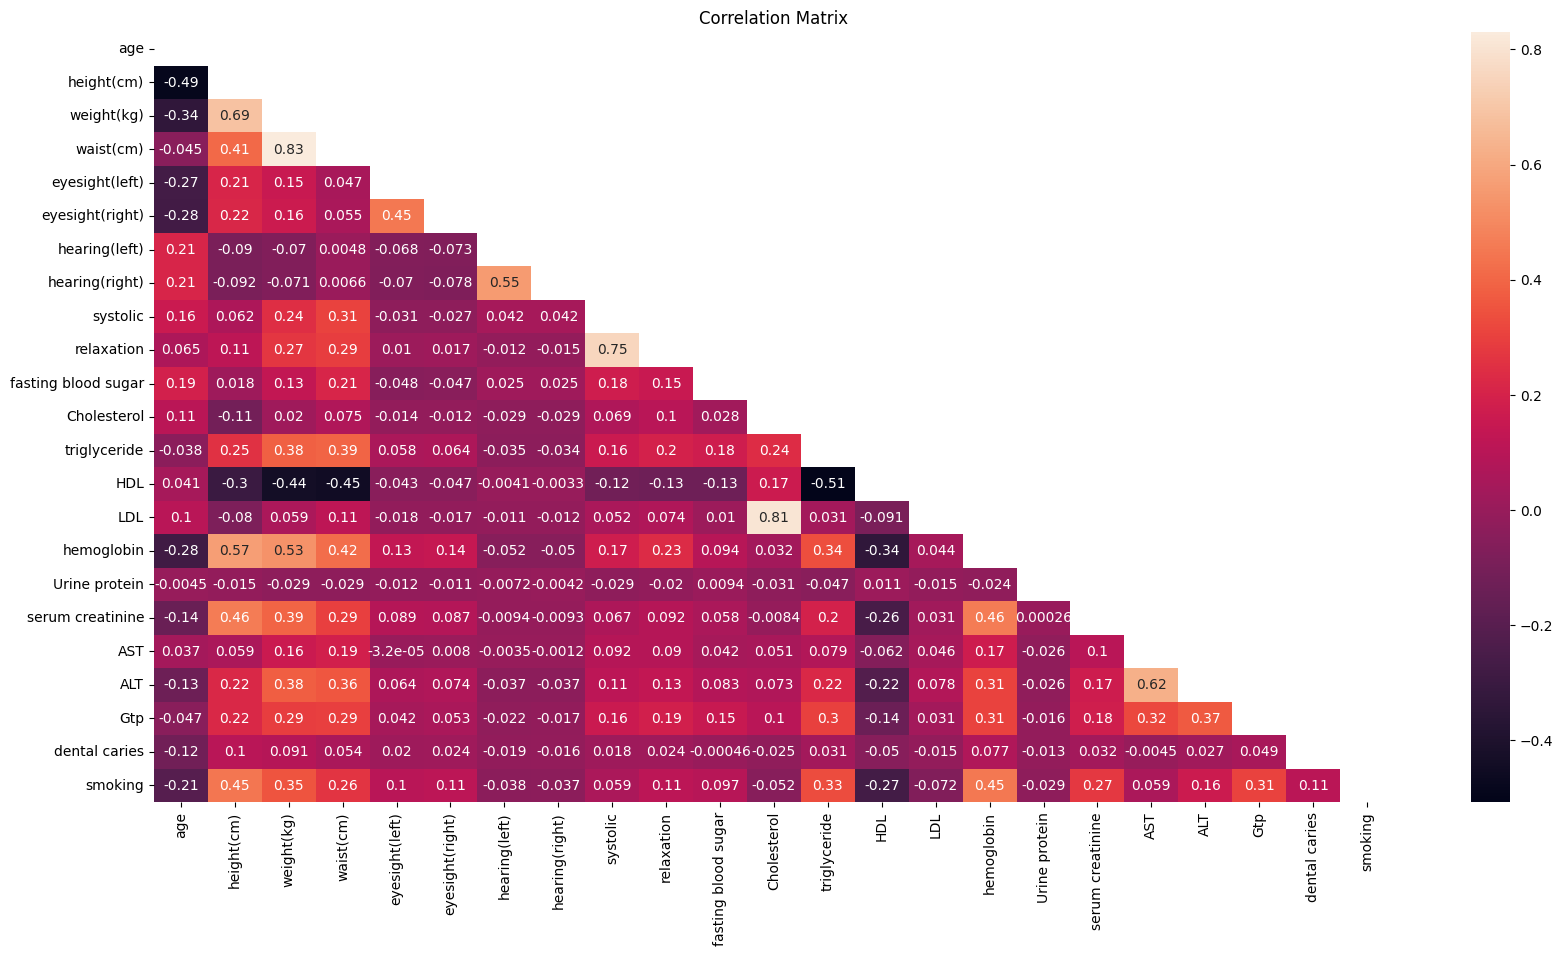

In [103]:
plot_heatmap(train, x = 20, y = 10)

Lets check the data for individual columns

In [104]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [105]:
cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries']

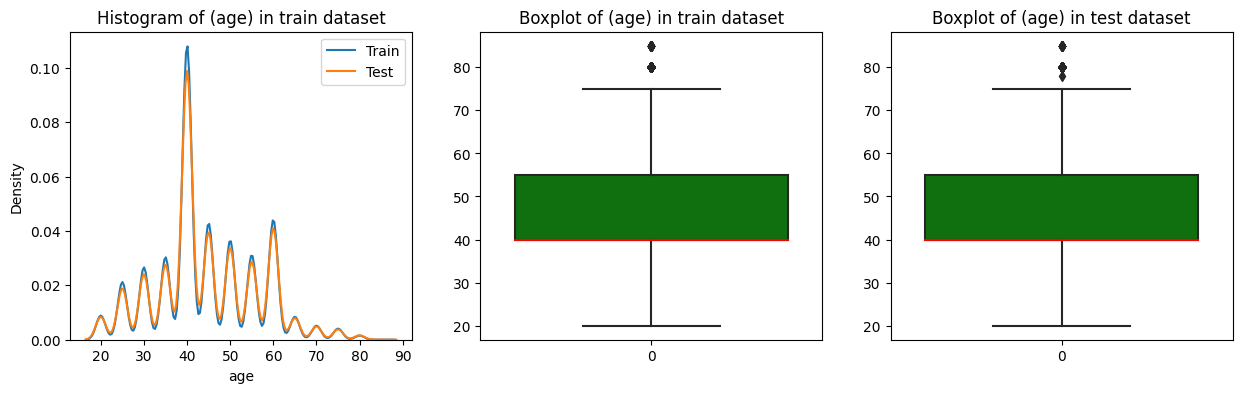

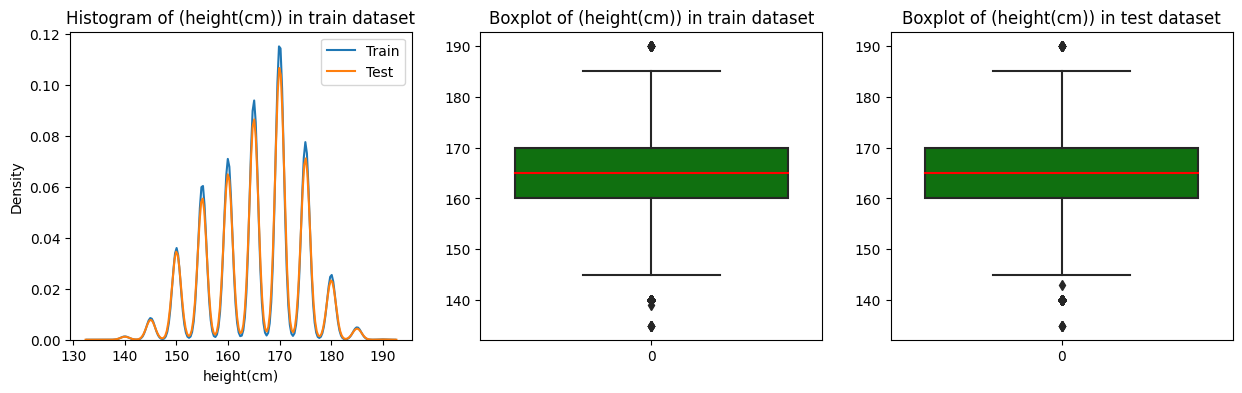

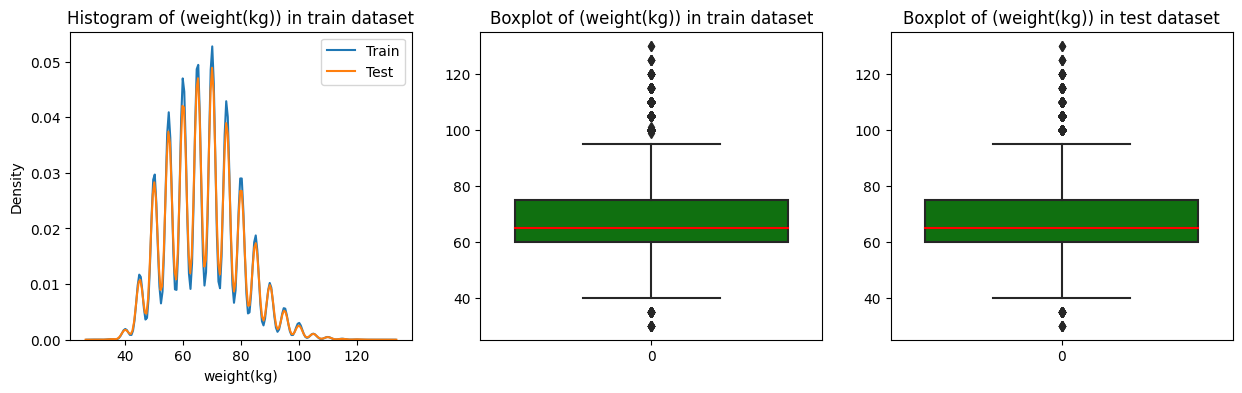

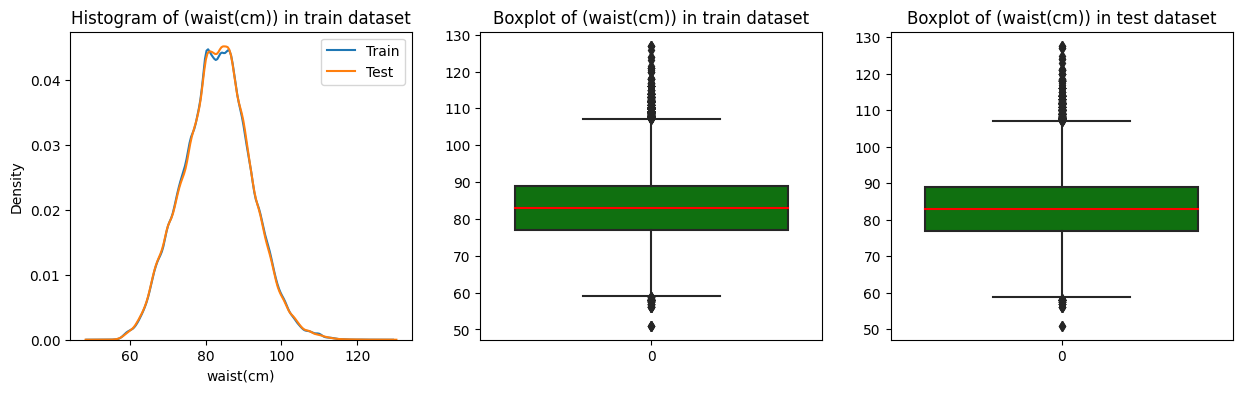

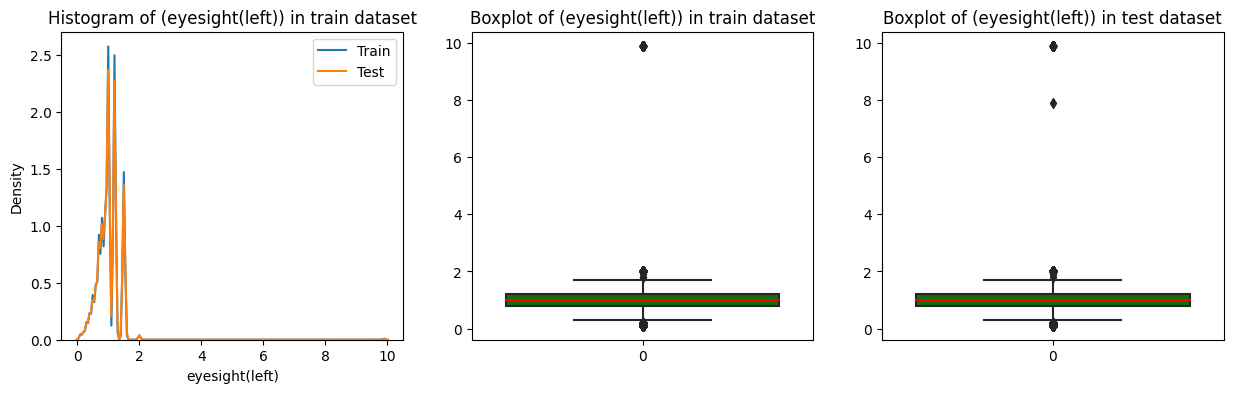

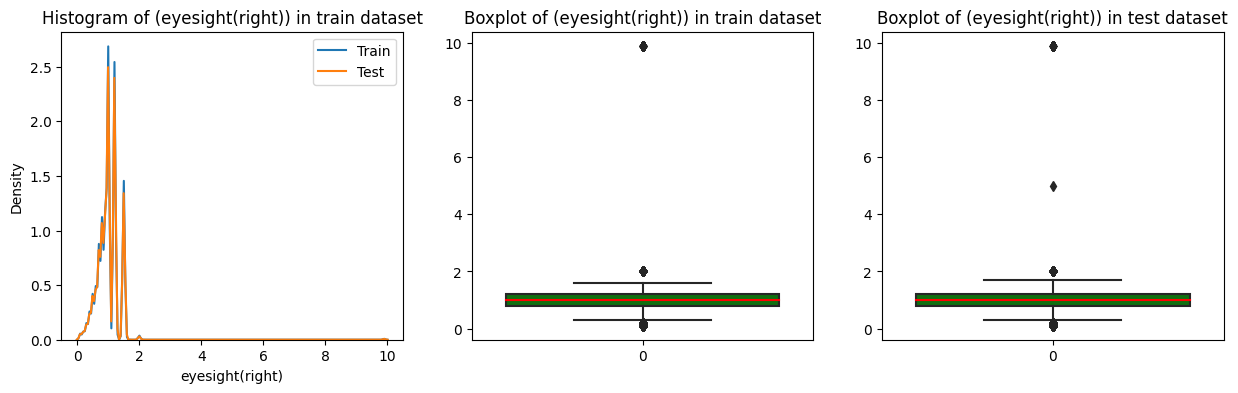

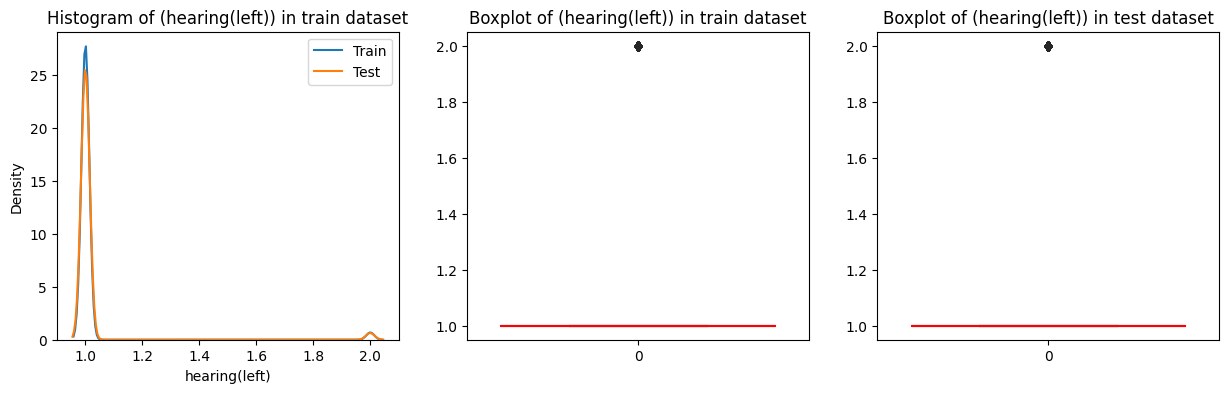

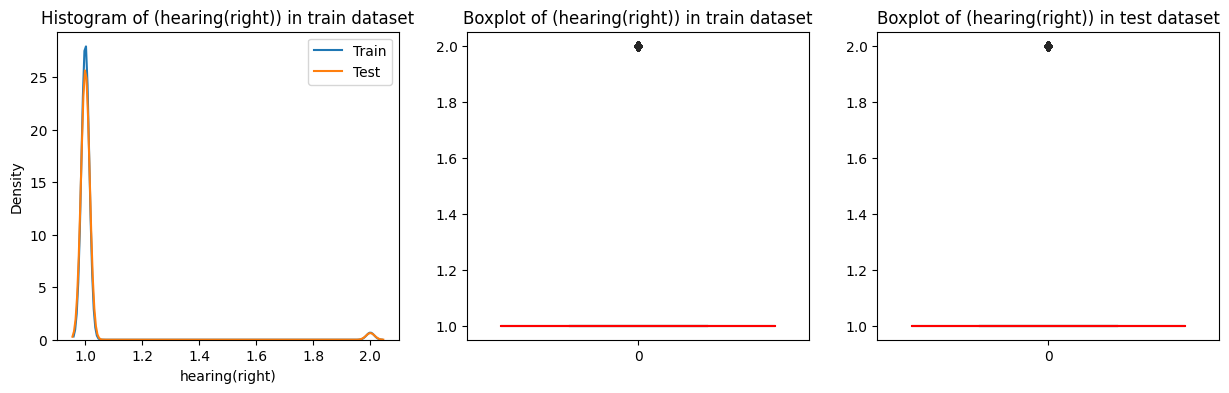

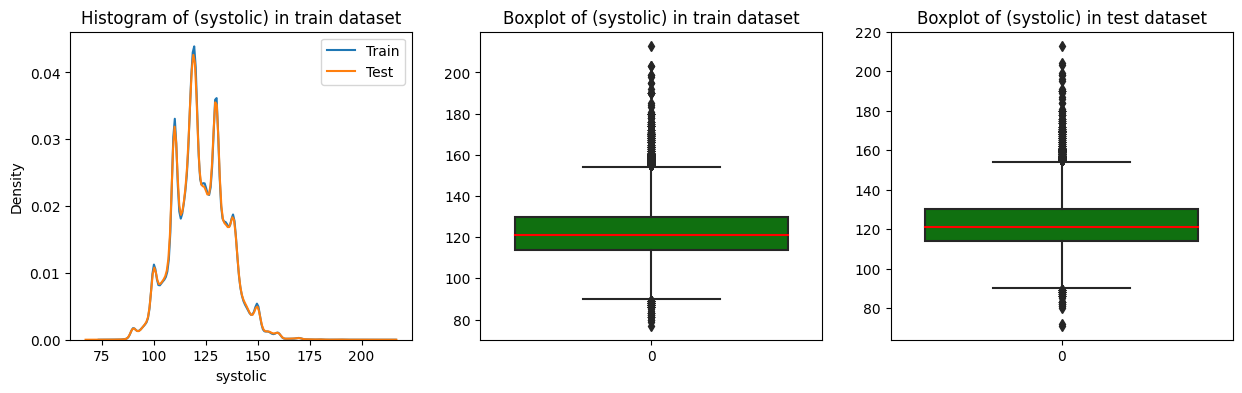

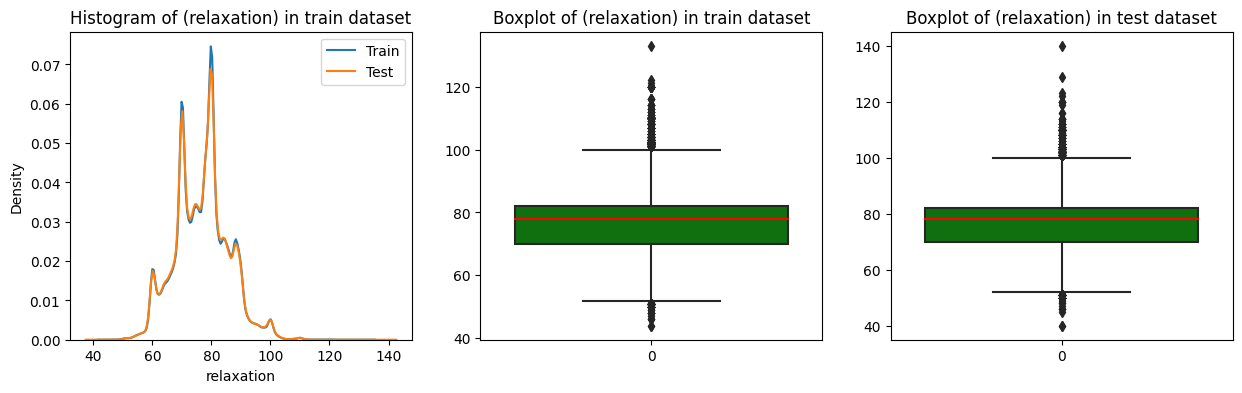

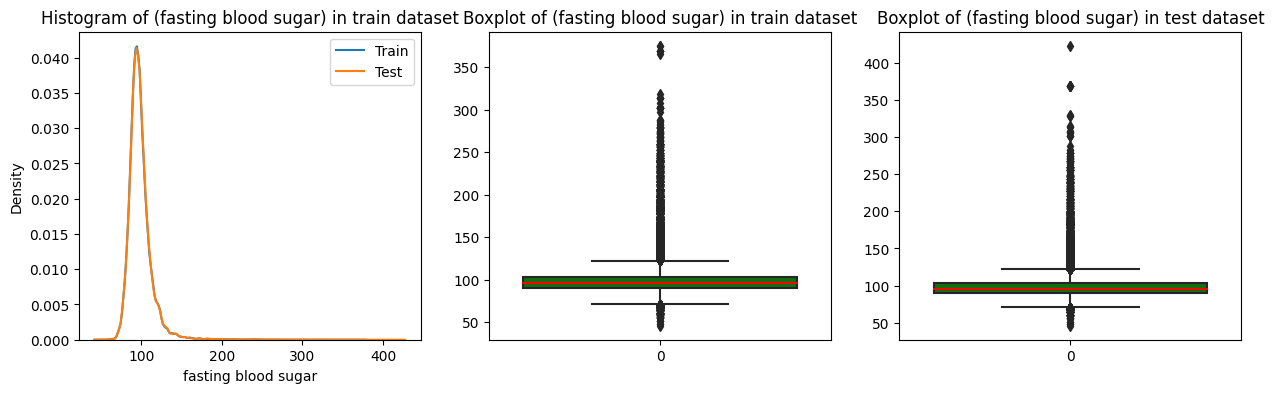

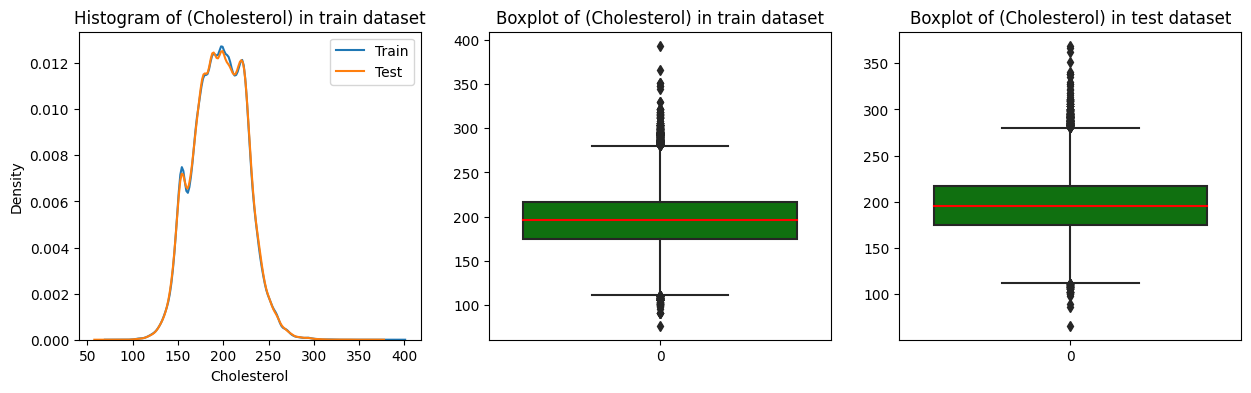

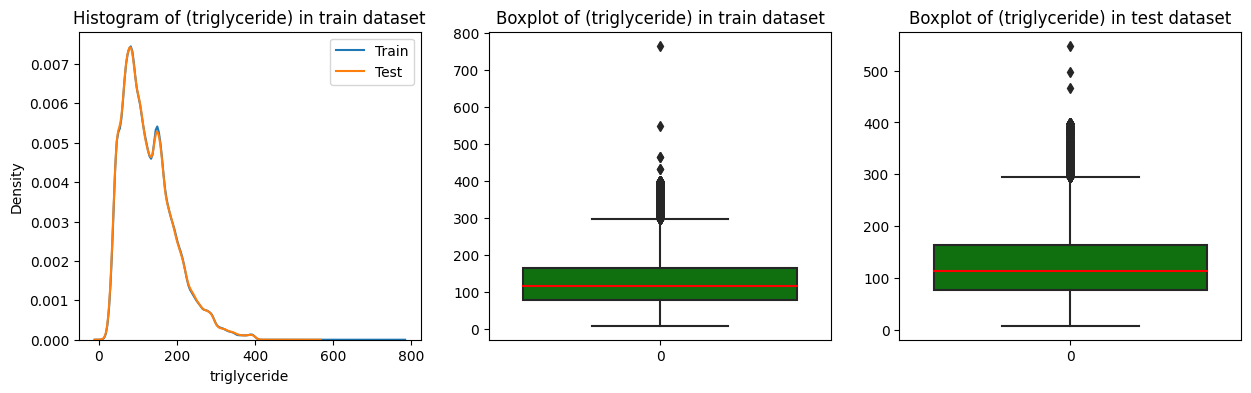

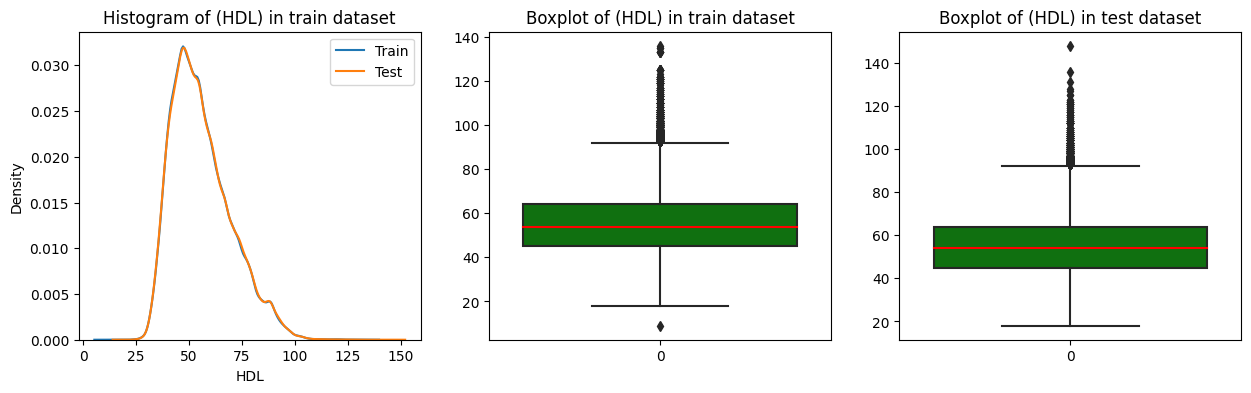

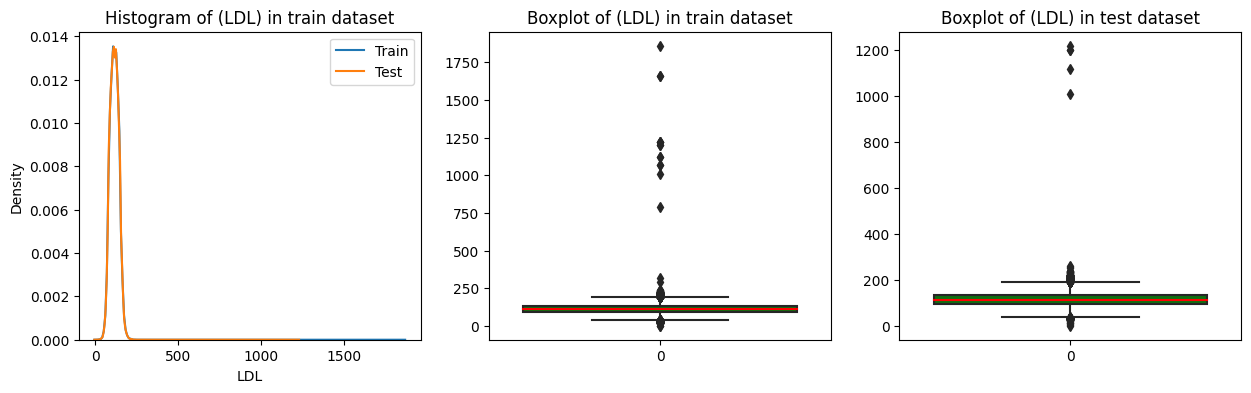

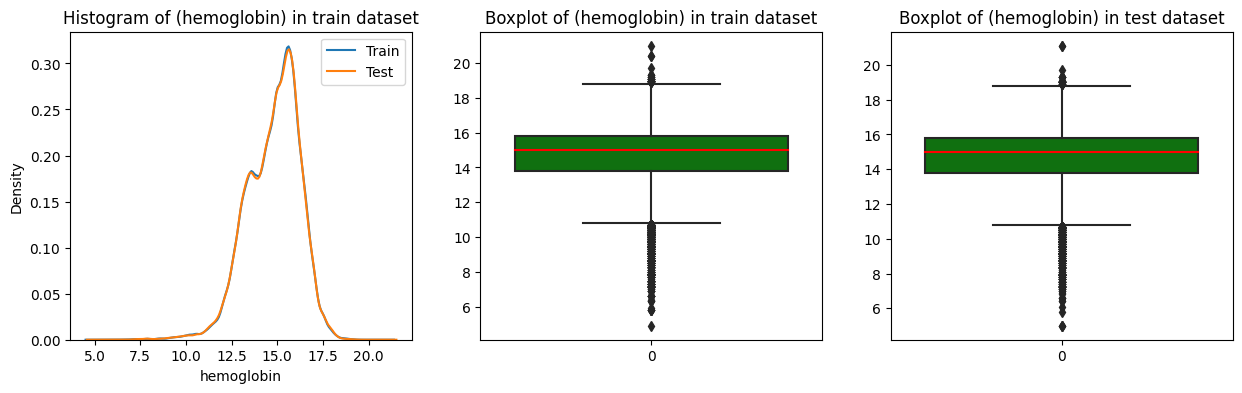

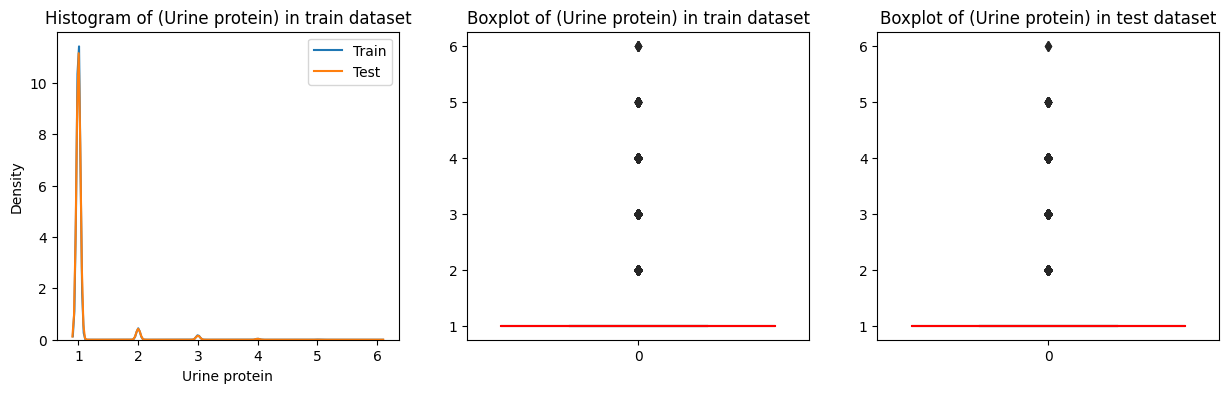

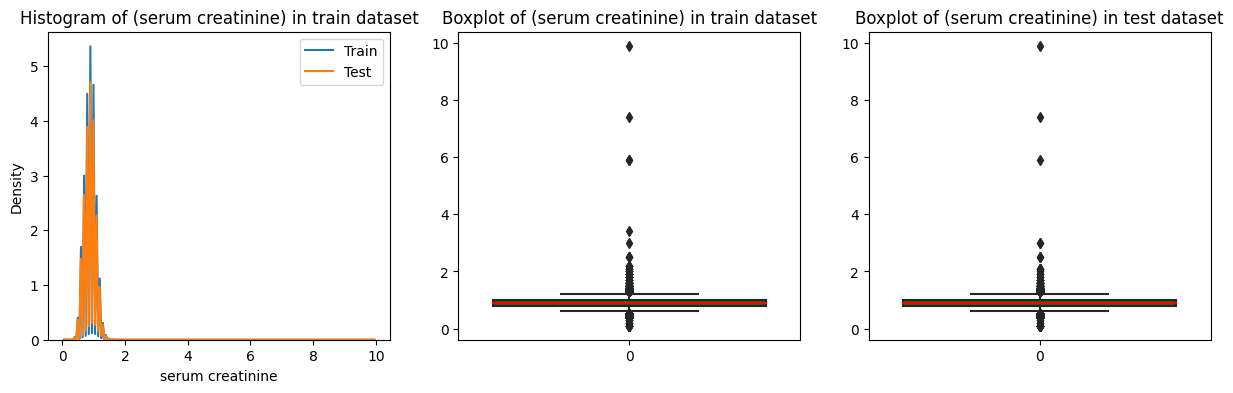

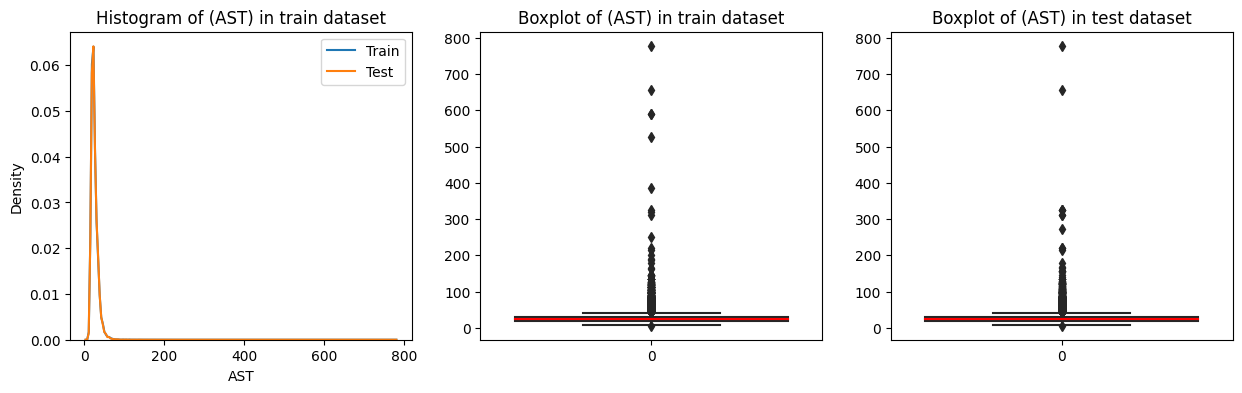

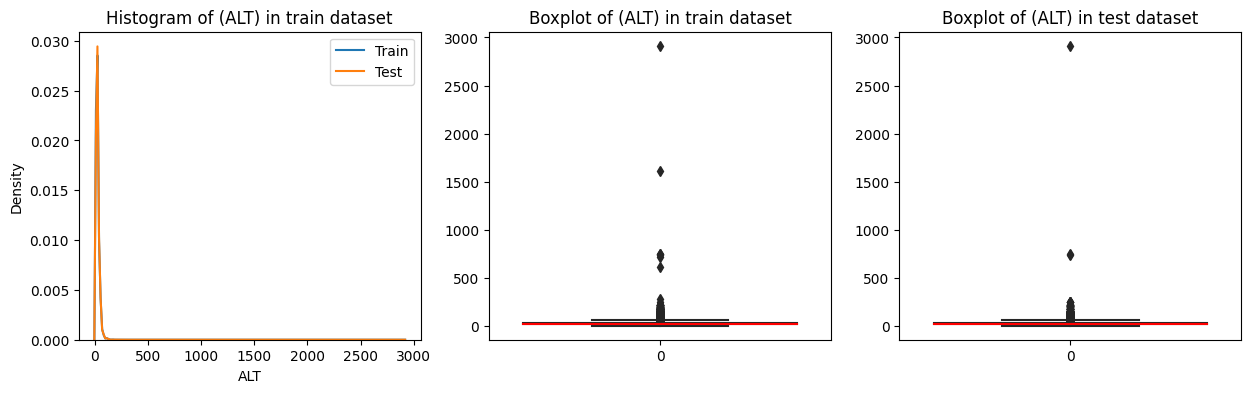

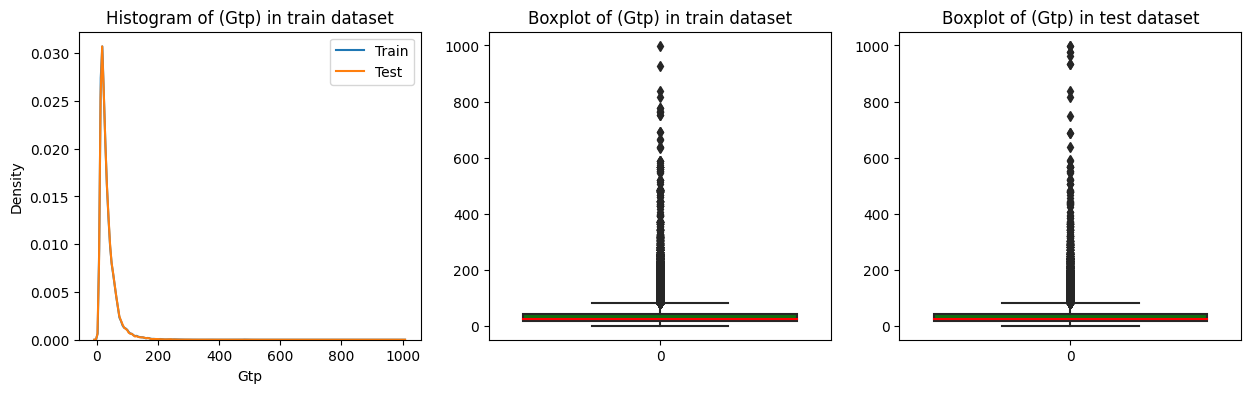

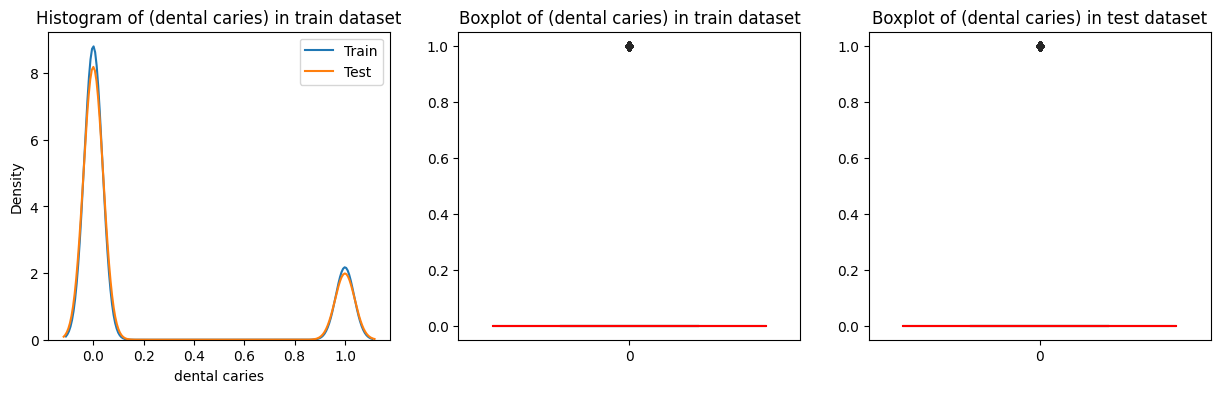

In [106]:
for col in cols:
    plot_distribution(train,test,col)

In [107]:
## lets find those columns which are binary in nature and also those columns which has very few categories

binary_cols = [cols for cols in train.columns if train[cols].nunique() < 3 and train[cols].name != 'smoking']
cat_cols = [cols for cols in train.columns if train[cols].nunique() < 10 and train[cols].nunique() > 2 and train[cols].name != 'smoking']

In [108]:
train[binary_cols].describe()

,hearing(left),hearing(right),dental caries
count,159256.000000,159256.000000,159256.000000
mean,1.023974,1.023421,0.197996
std,0.152969,0.151238,0.398490
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000


Looks like for the hearing columns its starts from 1 and ends at 2. The dental caries columsn is binary in nature with value ranging from [0,1]

In [109]:
train[cat_cols].describe()

,Urine protein
count,159256.000000
mean,1.074233
std,0.347856
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,6.000000


In [110]:
print(f"The unique value for the Urine protein column are: {train[cat_cols]['Urine protein'].unique()}")
print('The distribution of the Urine protein columns wrt target(smoking) is:')

pd.crosstab(train['Urine protein'],train['smoking'])

The unique value for the Urine protein column are: [1 3 2 4 5 6]
The distribution of the Urine protein columns wrt target(smoking) is:


smoking,0,1
Urine protein,,
1,84311,66551
2,3549,2060
3,1402,826
4,287,190
5,48,26
6,6,0


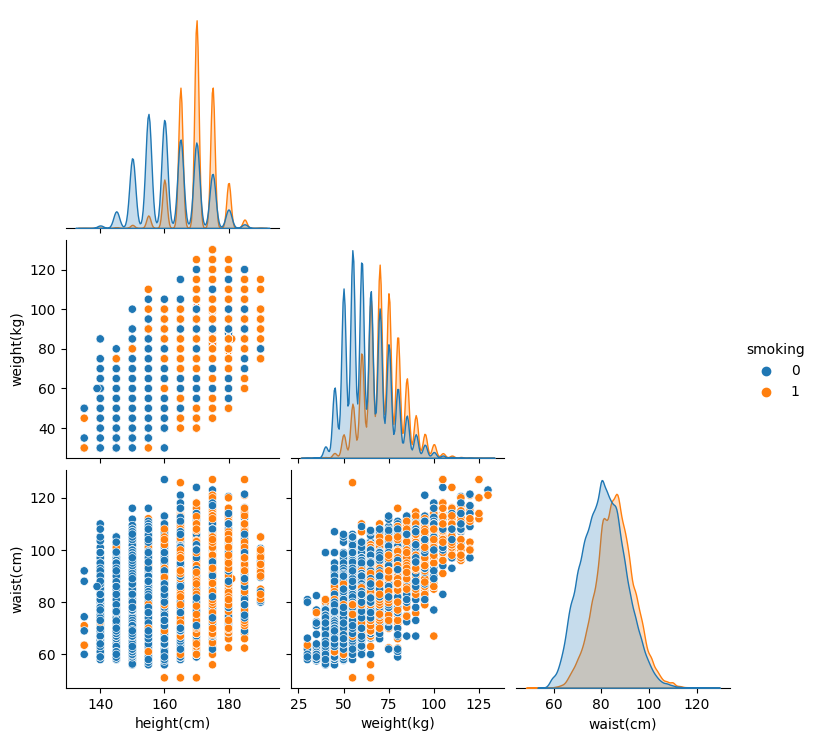

In [111]:
sns.pairplot(data = train[['height(cm)', 'weight(kg)', 'waist(cm)', 'smoking']], hue = 'smoking', corner = True);

There seems to be a shift in distribution for some of the features when splitted by smoking vs non-smoking
1. People who are short are usually non-smokers
2. People who weighs less are usually non-smokers

In [112]:
train.skew().sort_values()

hemoglobin             -0.633571
height(cm)             -0.269915
Cholesterol             0.043488
waist(cm)               0.072446
relaxation              0.176350
systolic                0.219925
smoking                 0.252532
age                     0.291697
weight(kg)              0.378075
HDL                     0.758884
triglyceride            0.986228
serum creatinine        1.511059
dental caries           1.515762
fasting blood sugar     3.461099
Gtp                     5.414827
Urine protein           5.585562
hearing(left)           6.223920
hearing(right)          6.302437
LDL                     6.874810
eyesight(right)         8.486849
eyesight(left)          8.890572
AST                    11.592346
ALT                    34.830012
dtype: float64

####  Few of these columns are highly skewed, which needs to be corrected.

In [113]:
train[['AST','ALT','eyesight(right)','eyesight(left)']].corr()

,AST,ALT,eyesight(right),eyesight(left)
AST,1.000000,0.623408,0.007967,-0.000032
ALT,0.623408,1.000000,0.073843,0.063819
eyesight(right),0.007967,0.073843,1.000000,0.448945
eyesight(left),-0.000032,0.063819,0.448945,1.000000


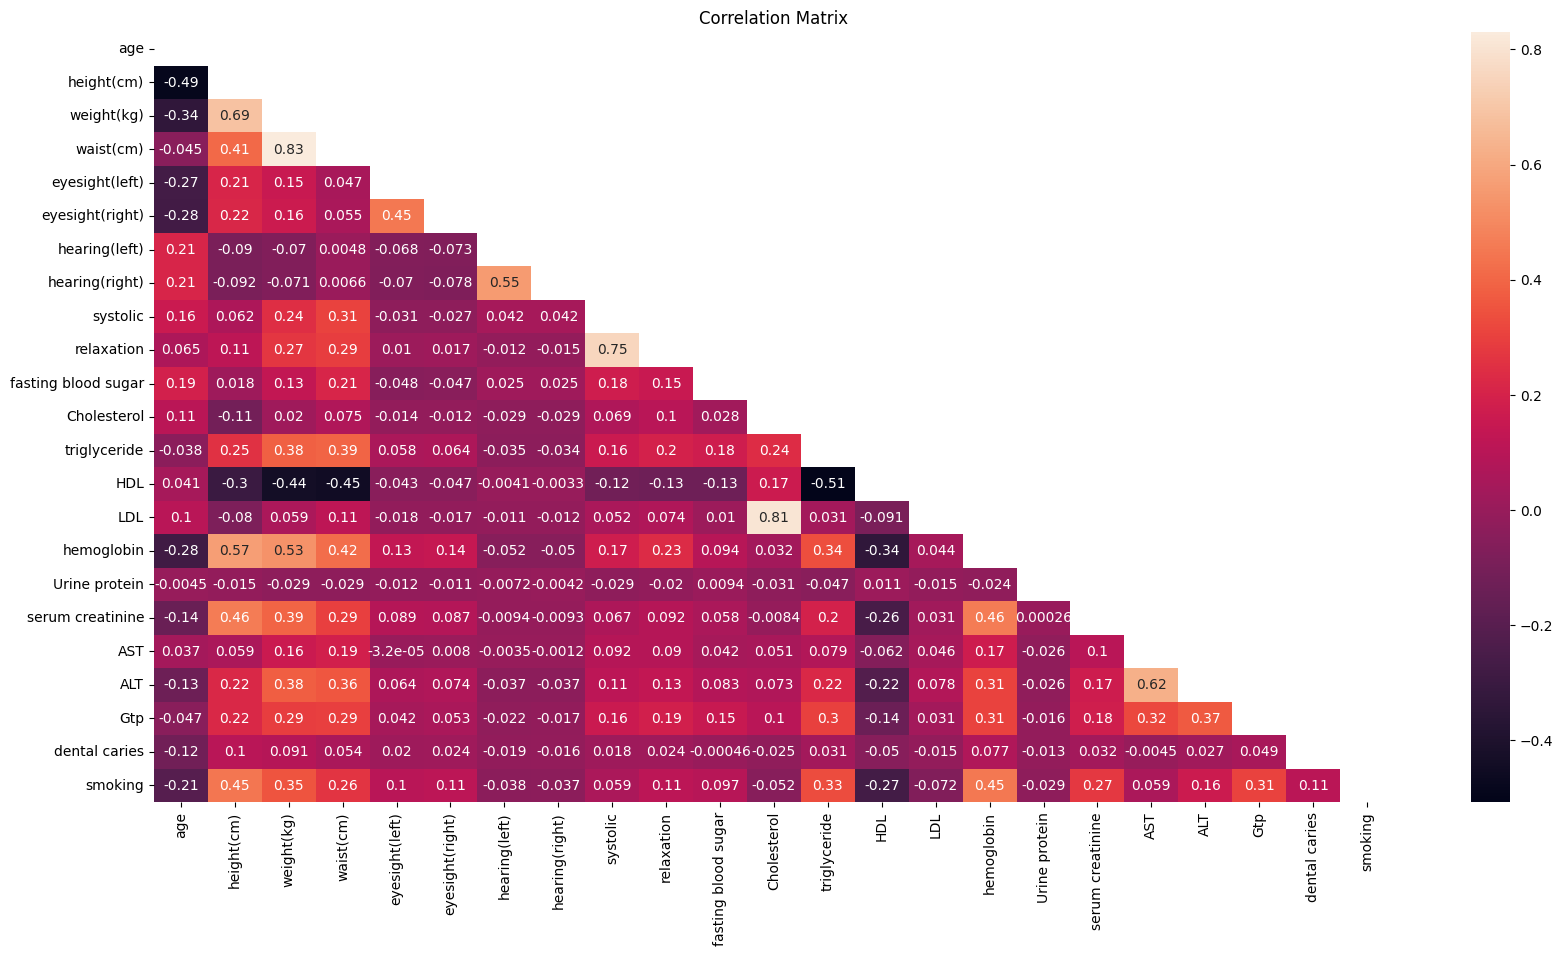

In [114]:
plot_heatmap(train, x = 20, y = 10)

### There are some columns which are highly correlated with each other. These columns can be treated.

1. weight(kg) ~ waist(cm)
2. weight (kg) ~ height(cm)
3. hemoglobin ~ height (cm)
4. systolic ~ relaxation
5. Cholesterol ~ LDL
6. AST ~ ALT

In [115]:
#Lets covert the distribution of some of the columns to gaussian

columns_to_transform = ['age', 'height(cm)','weight(kg)', 'waist(cm)','eyesight(left)', 'eyesight(right)','systolic', 'relaxation',
              'fasting blood sugar', 'Cholesterol','triglyceride', 'HDL','LDL', 'hemoglobin','serum creatinine', 'AST',
               'ALT', 'Gtp']

train_mod = pd.DataFrame()
test_mod = pd.DataFrame()

# Apply the Box-Cox transformation to selected columns
for column in columns_to_transform:
    train_transformed_data, train_lambda_value = stats.boxcox(train[column])
    test_transformed_data, test_lambda_value = stats.boxcox(test[column])
    train_mod[column] = train_transformed_data
    test_mod[column] = test_transformed_data

In [116]:
train_mod.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
0,15.872195,2.366477e+06,6.312139,35.490597,-0.596556,-0.453338,11.998510,17.142770,0.541991,94.995025,9.299604,2.141798,10.522190,1178.421847,0.000000,1.429504,2.256882,2.044072
1,18.511579,2.366477e+06,6.493719,38.212034,-0.456993,-0.327976,12.385221,16.689975,0.542061,105.444926,5.609620,2.241779,13.290612,1117.276443,0.098051,1.461166,2.217412,2.149445
2,8.066468,2.595609e+06,6.825612,35.490597,-0.752672,-0.590185,11.356484,15.751054,0.541944,97.863004,8.289758,2.176342,11.606759,1374.914680,-0.209028,1.461166,2.355203,2.257450
3,11.817244,3.098046e+06,7.394904,43.484420,0.444293,0.190487,11.852603,17.254363,0.541983,98.815908,8.359574,2.126333,12.099316,1058.248245,0.000000,1.413424,2.292632,2.080487
4,10.659960,2.366477e+06,6.312139,35.318395,0.444293,0.000000,11.474137,15.871020,0.541983,86.789218,6.510812,2.169853,11.606759,964.476548,-0.209028,1.404393,1.925512,1.868955


In [117]:
train_mod[['hearing(left)','hearing(right)','dental caries','Urine protein','smoking']] =  train[['hearing(left)','hearing(right)','dental caries','Urine protein','smoking']]

In [118]:
test_mod[['hearing(left)','hearing(right)','dental caries','Urine protein']] =  test[['hearing(left)','hearing(right)','dental caries','Urine protein']]

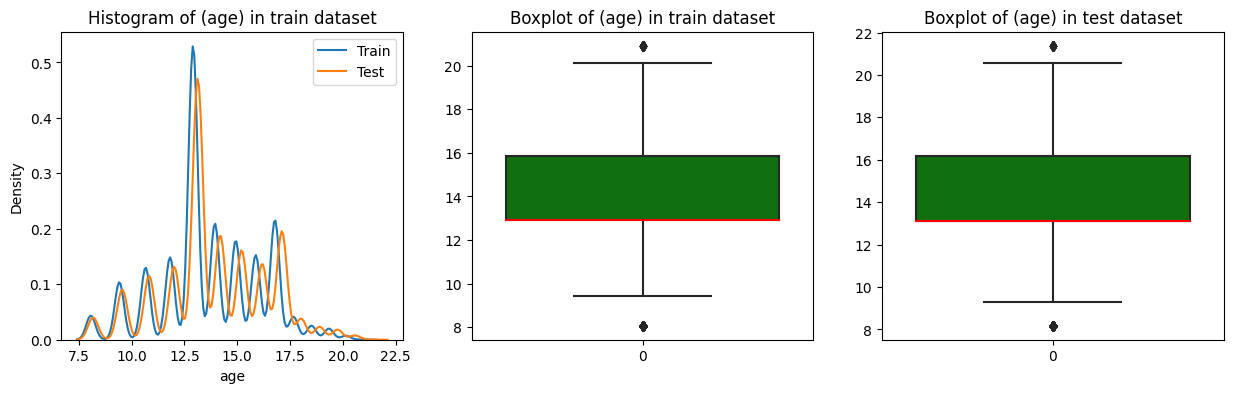

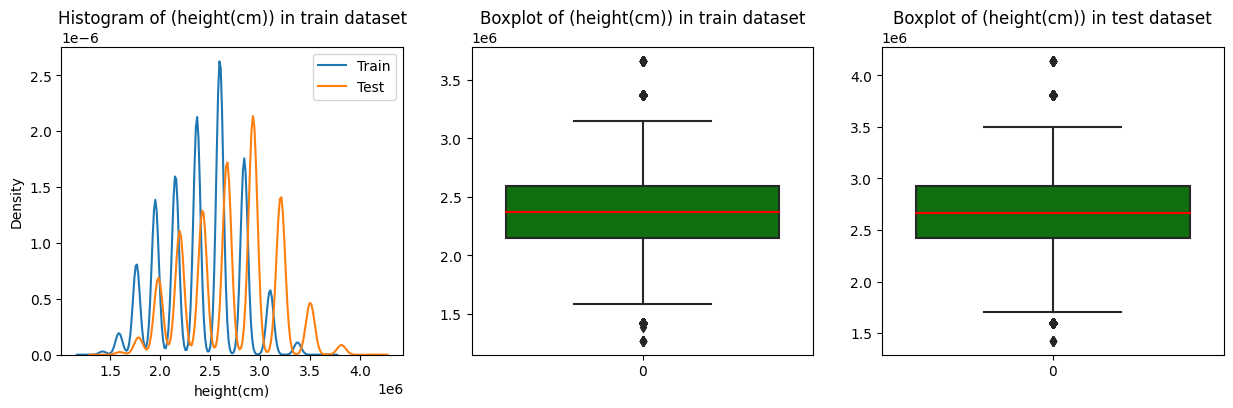

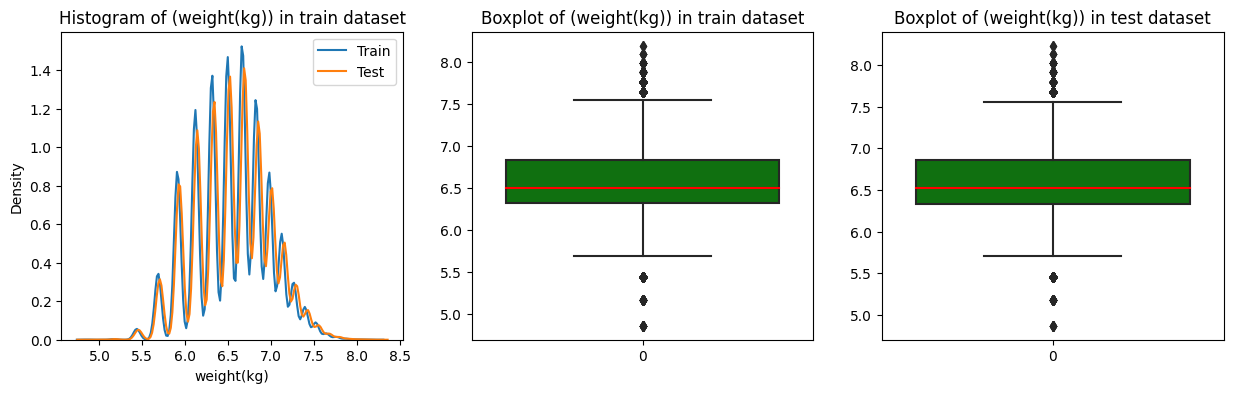

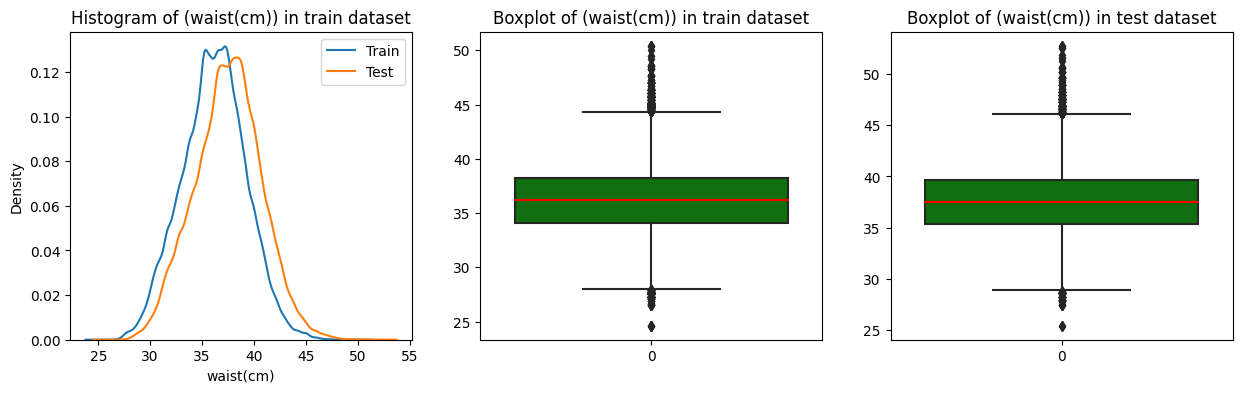

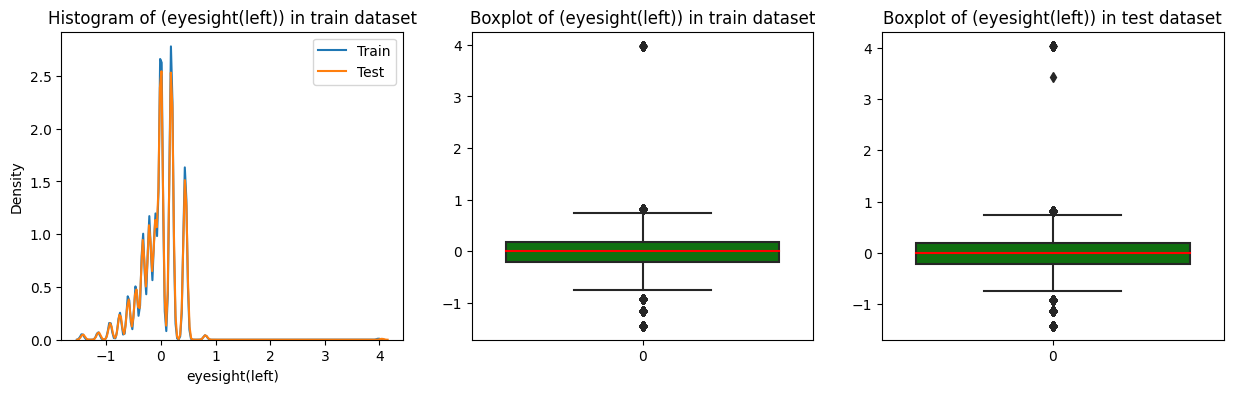

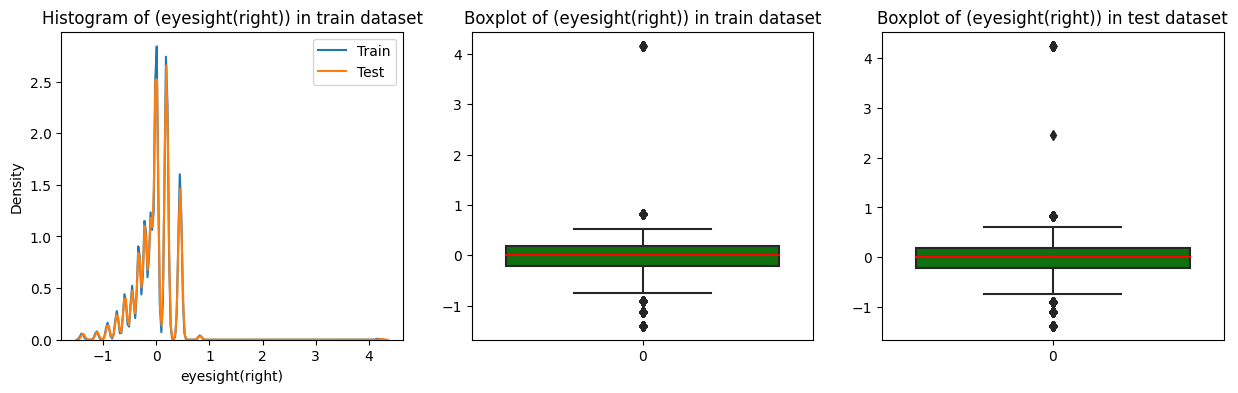

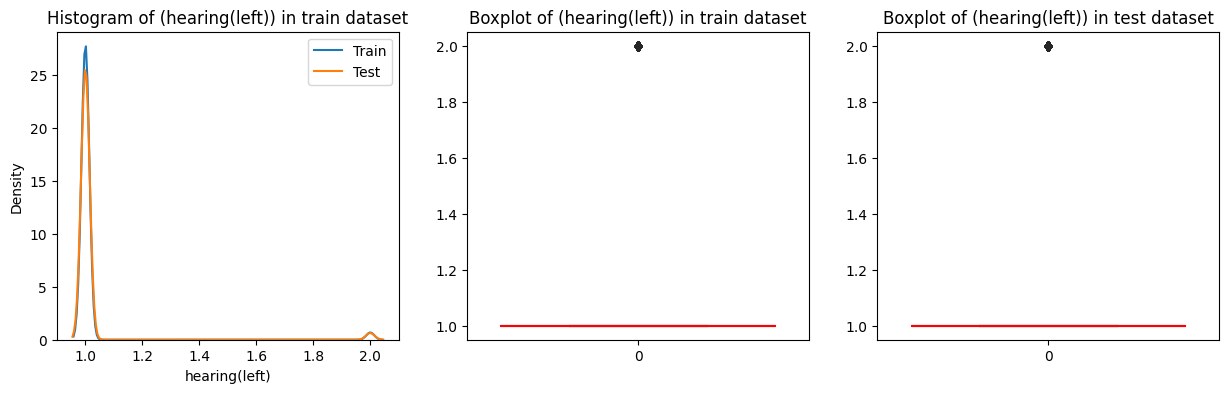

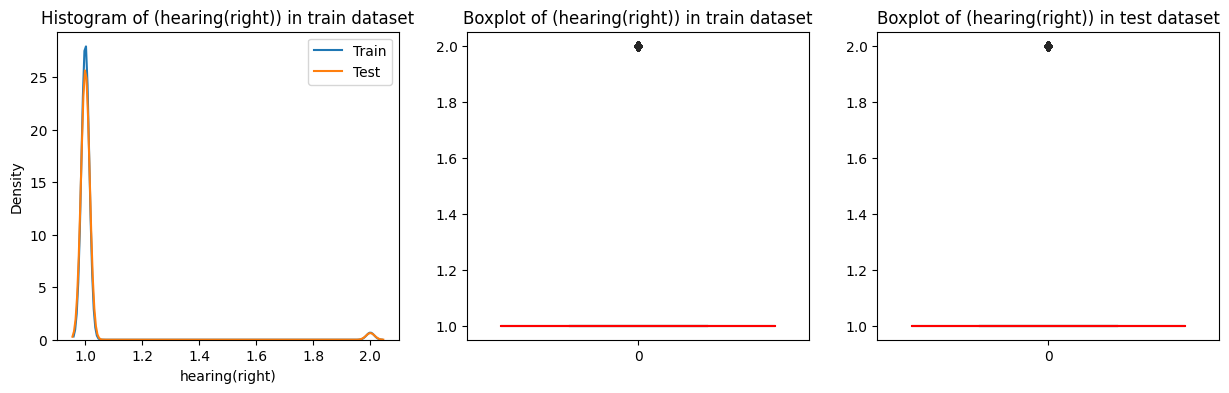

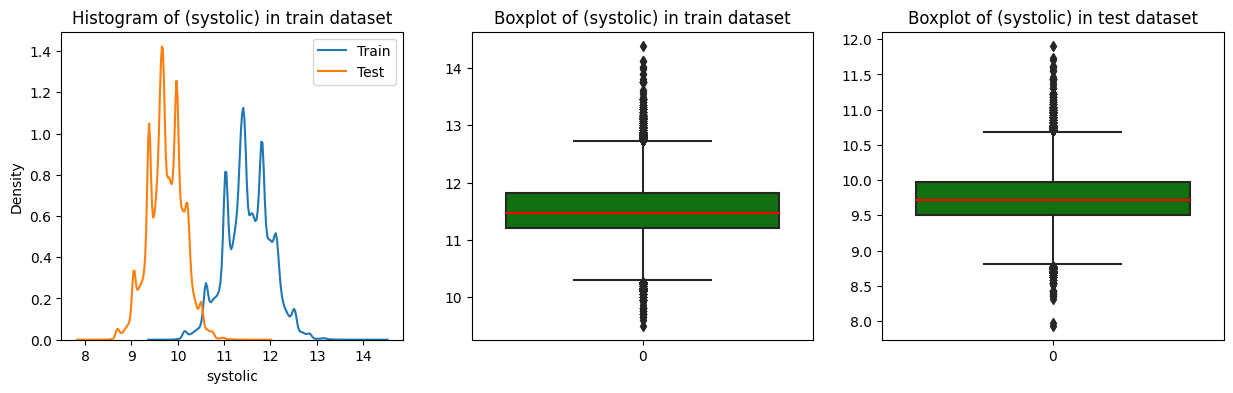

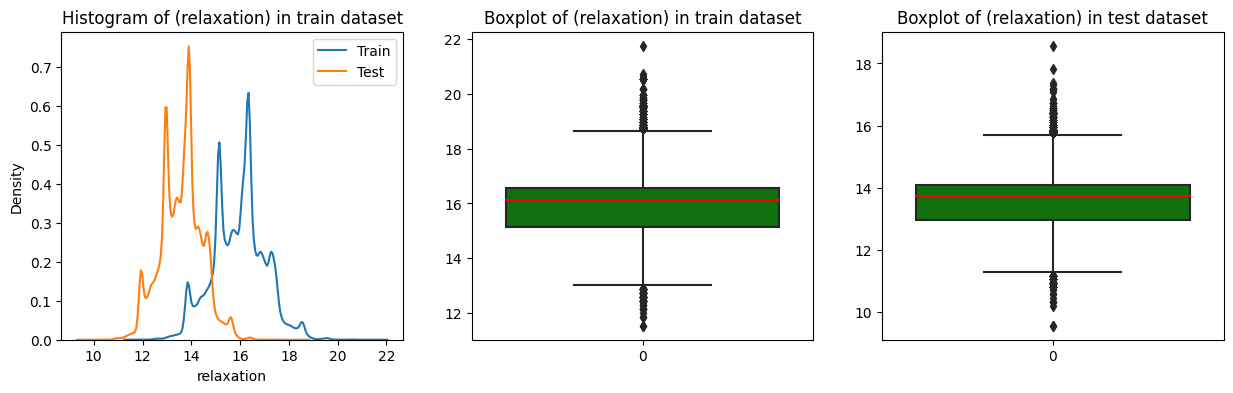

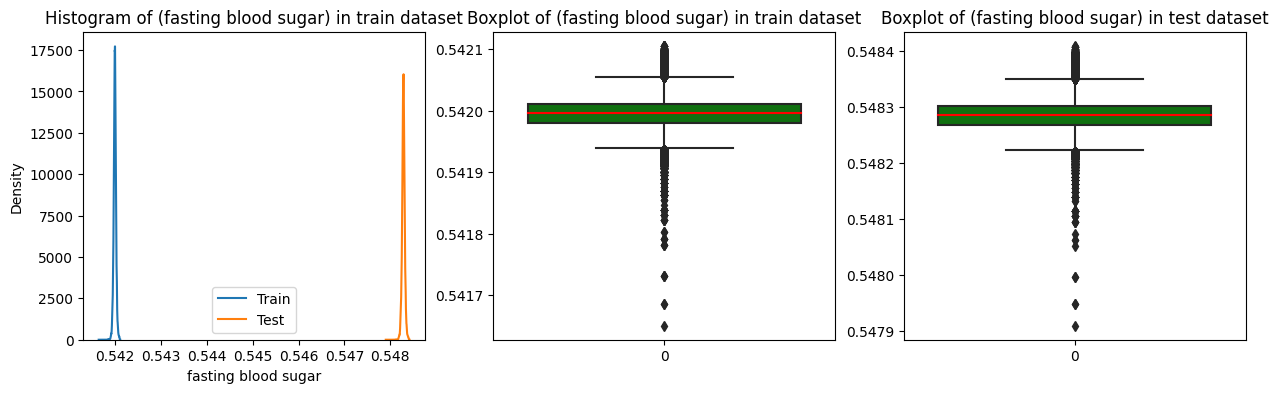

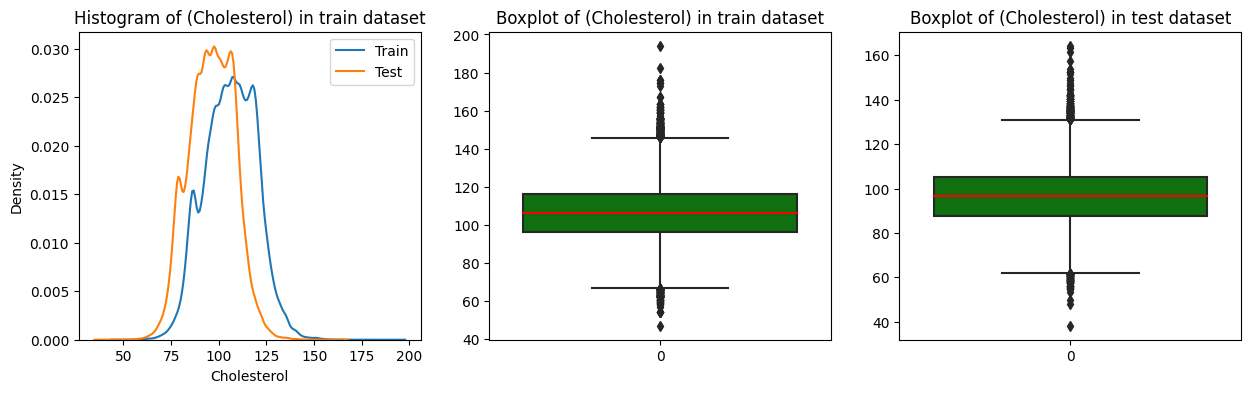

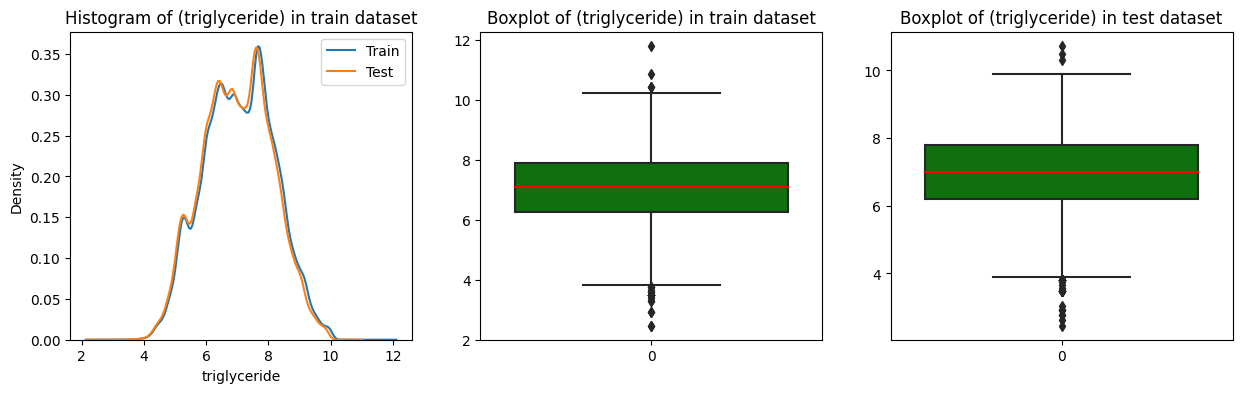

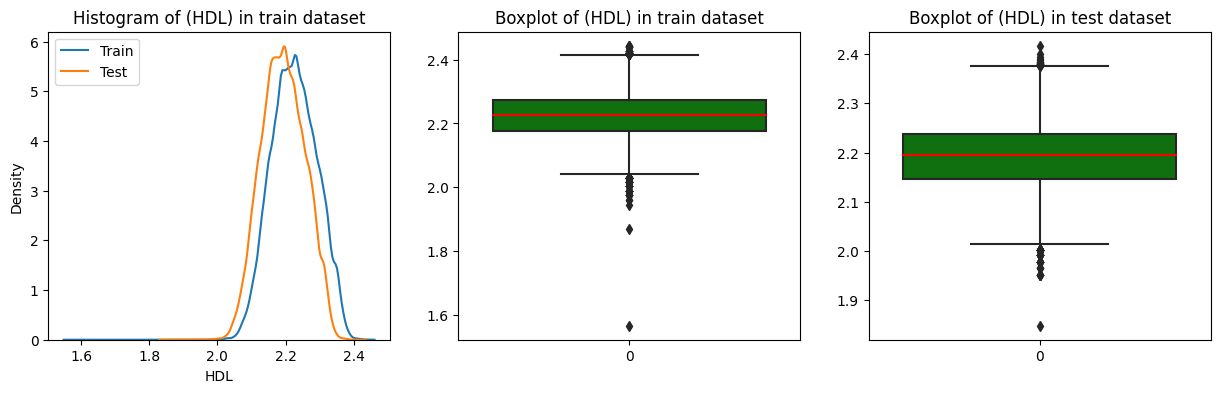

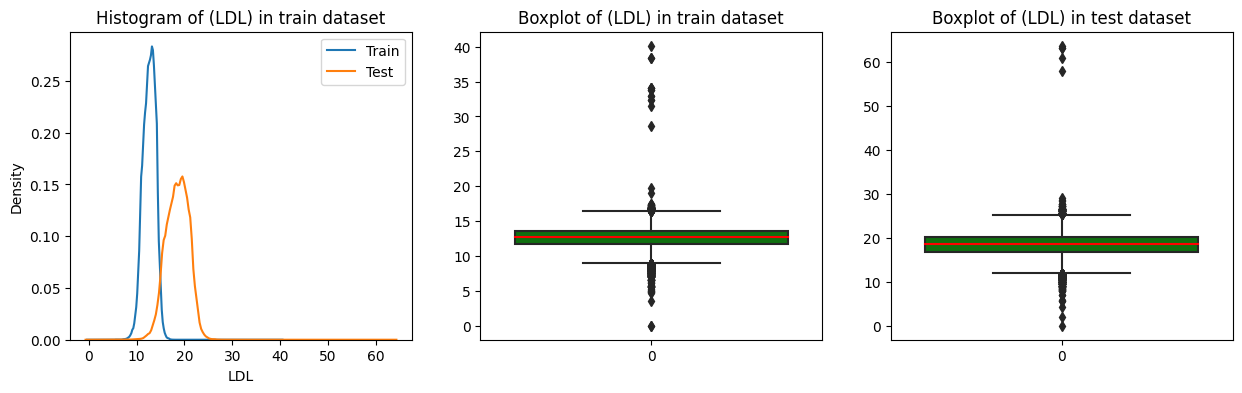

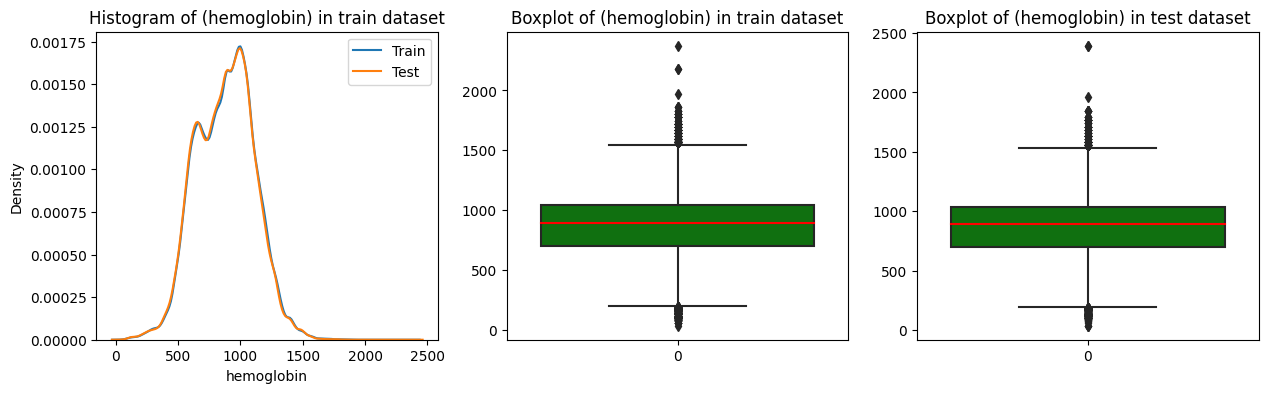

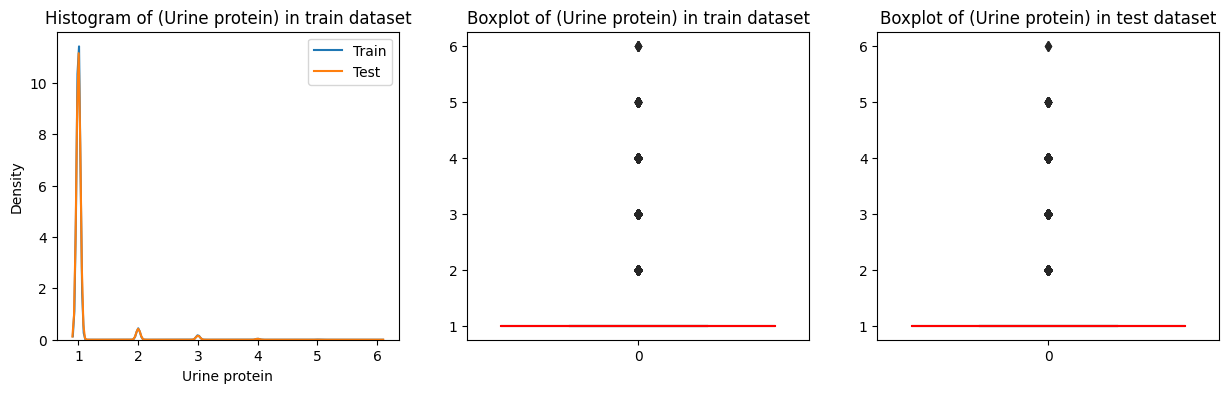

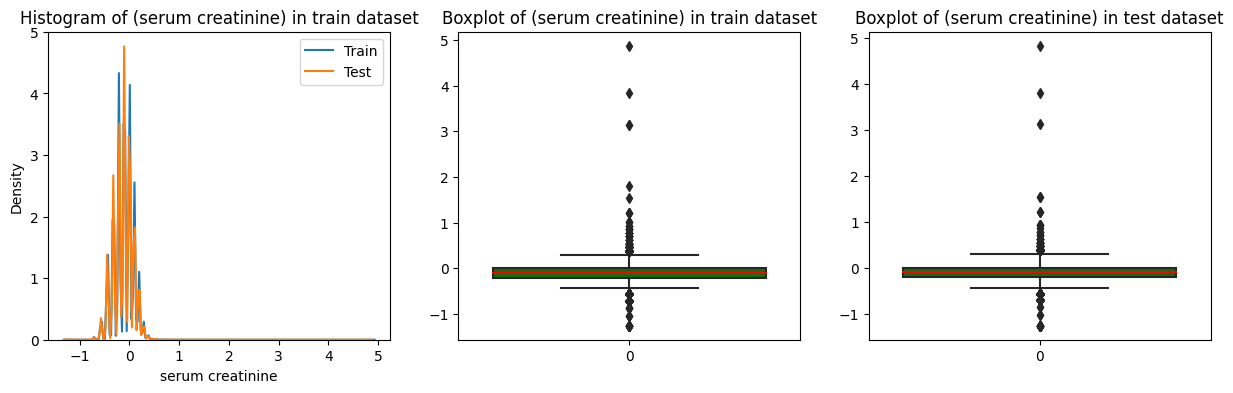

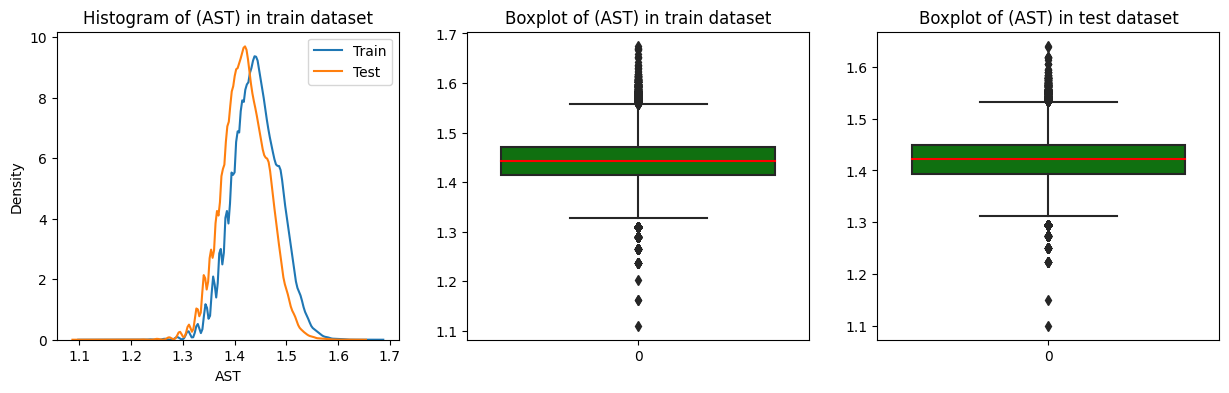

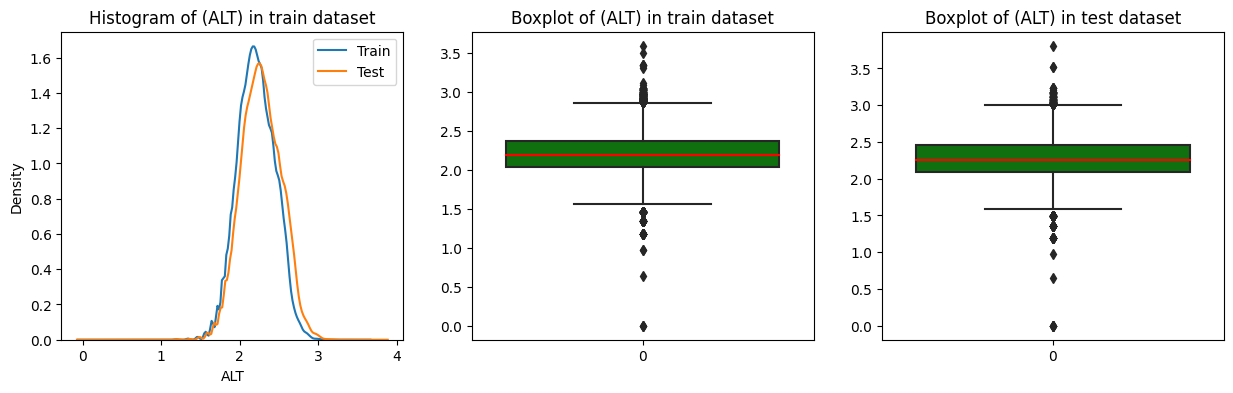

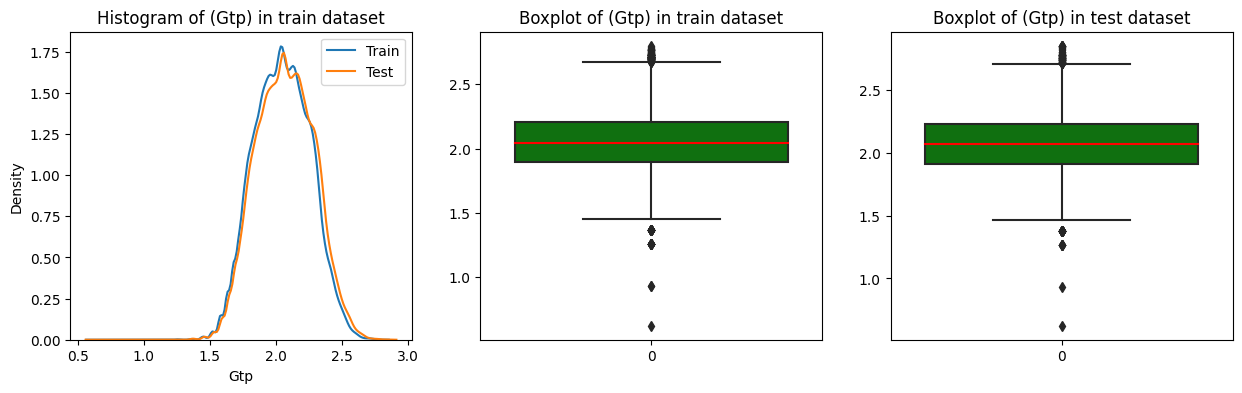

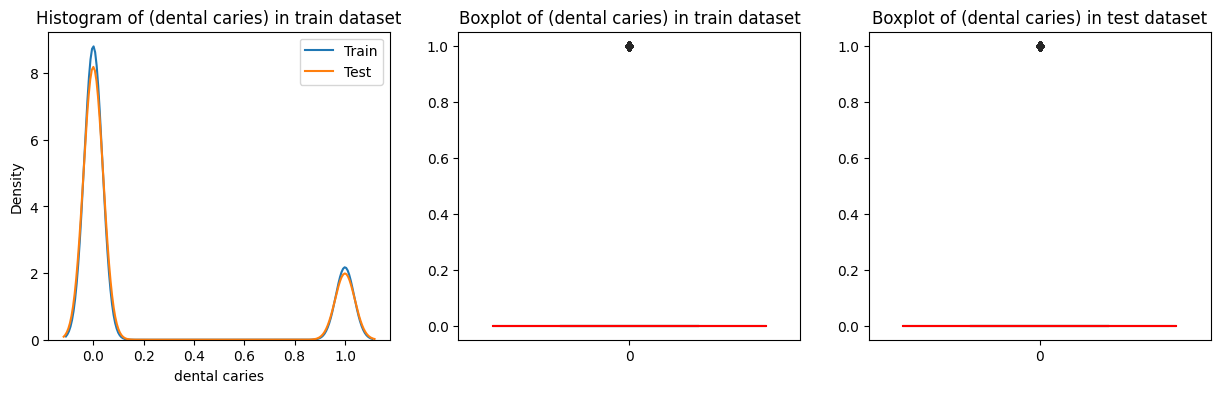

In [119]:
for col in cols:
    plot_distribution(train_mod,test_mod,col)

## Feature Engineering

In [120]:
# cols_to_drop = ['id', 'weight(kg)', 'hemoglobin','systolic','LDL','AST']

In [121]:
# def count_outliers(df, select_features):
#     df_subset = df[select_features]
#     clf = IsolationForest(contamination='auto')
#     predictions = clf.fit_predict(df_subset)

#     outlier_count_df = pd.DataFrame({
#         'Outlier_Count': [(pred == -1) for pred in predictions]
#     })
#     total_outliers = outlier_count_df['Outlier_Count'].sum()
#     df['Outlier_Count'] = outlier_count_df
#     return df


# total = count_outliers(train,train.columns)

In [122]:
train_mod.shape

(159256, 23)

In [123]:
train.shape

(159256, 23)

## Data pre-processing

In [124]:
# train_mod = train.drop(columns = cols_to_drop)


In [125]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [126]:
train_mod = pd.get_dummies(train_mod, columns = ['dental caries'])
train_mod.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,serum creatinine,AST,ALT,Gtp,hearing(left),hearing(right),Urine protein,smoking,dental caries_0,dental caries_1
0,15.872195,2.366477e+06,6.312139,35.490597,-0.596556,-0.453338,11.998510,17.142770,0.541991,94.995025,...,0.000000,1.429504,2.256882,2.044072,1,1,1,1,True,False
1,18.511579,2.366477e+06,6.493719,38.212034,-0.456993,-0.327976,12.385221,16.689975,0.542061,105.444926,...,0.098051,1.461166,2.217412,2.149445,2,2,1,0,False,True
2,8.066468,2.595609e+06,6.825612,35.490597,-0.752672,-0.590185,11.356484,15.751054,0.541944,97.863004,...,-0.209028,1.461166,2.355203,2.257450,1,1,1,1,True,False
3,11.817244,3.098046e+06,7.394904,43.484420,0.444293,0.190487,11.852603,17.254363,0.541983,98.815908,...,0.000000,1.413424,2.292632,2.080487,1,1,1,0,False,True
4,10.659960,2.366477e+06,6.312139,35.318395,0.444293,0.000000,11.474137,15.871020,0.541983,86.789218,...,-0.209028,1.404393,1.925512,1.868955,1,1,1,1,True,False


In [127]:
X = train_mod[['age', 'height(cm)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
       'hearing(left)', 'hearing(right)', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'Urine protein',
       'serum creatinine', 'ALT', 'Gtp', 'dental caries_0']]

y = train_mod['smoking']

## Model Building

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [129]:
# scaler = StandardScaler()

# scaler.fit(X_train,y_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### Randomforest model

In [130]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7677290457615831


## Logistic Regression

In [131]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

accuracy_score(y_test,y_pred)

0.6449053372657216

### KNN Classifier

In [132]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test,y_pred)

0.7073351726762439

### XGB Classifier

In [133]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

accuracy_score(y_test,y_pred)

0.7706783369803063

### LGBM

In [134]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

accuracy_score(y_test,y_pred)

0.7733231852345163

## Testing (Baseline Modelling)

In [135]:
skf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

knn_cv_routine = cross_val_score(KNeighborsClassifier(n_neighbors = 220),
                                 X,
                                 y,
                                 scoring = 'accuracy',
                                 cv = skf,
                                 n_jobs = -1)

print(f"The average oof ROC-AUC score of the k-NN model is {knn_cv_routine.mean()}")

The average oof ROC-AUC score of the k-NN model is 0.7285439675768877


In [136]:
XGB_cv_routine = cross_val_score(XGBClassifier(tree_method = 'hist',
                                               n_estimators = 600,
                                               learning_rate = 0.1,
                                               colsample_bytree = 0.5), 
                                 X,
                                 y,
                                 scoring = 'roc_auc',
                                 cv = skf, 
                                 n_jobs = -1)

print(f"The average oof ROC-AUC score of the XGB model is {XGB_cv_routine.mean()}")

The average oof ROC-AUC score of the XGB model is 0.86212984785881
